<a href="https://colab.research.google.com/github/mh-fahim757/Employee-Attrition-Prediction-using-Machine-Learning/blob/main/422_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Importing Dataset

In [2]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('/content/employee attriation dataset (1).csv')

Saving employee attriation dataset (1).csv to employee attriation dataset (1).csv


Dataset Description

In [3]:
# Showing the first few rows of the dataset
dataset.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,...,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,...,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,...,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,...,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,...,80,0,31,0,3,31,14,4,10,1


In [4]:
num_features = dataset.shape[1]
print(f"The dataset contains {num_features} features.")

The dataset contains 35 features.


In [5]:
target_variable = 'Attrition'
if dataset[target_variable].dtype == 'object' or len(dataset[target_variable].unique()) <= 2:
    problem_type = 'Classification'
else:
    problem_type = 'Regression'

print(f"This is a {problem_type} problem because the target variable '{target_variable}' is {dataset[target_variable].dtype}.")


This is a Classification problem because the target variable 'Attrition' is int64.


In [6]:
num_data_points = dataset.shape[0]
print(f"The dataset contains {num_data_points} data points (rows).")

quantitative_features = dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_features = dataset.select_dtypes(include=['object']).columns
print(f"Quantitative features: {', '.join(quantitative_features)}")
print(f"Categorical features: {', '.join(categorical_features)}")


The dataset contains 1677 data points (rows).
Quantitative features: id, Age, DailyRate, DistanceFromHome, Education, EmployeeCount, EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobLevel, JobSatisfaction, MonthlyIncome, MonthlyRate, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition
Categorical features: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime


In [7]:
# We need to encode categorical variables for ML models to process them.
print(f"Categorical features that need encoding: {', '.join(categorical_features)}")


Categorical features that need encoding: BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Over18, OverTime


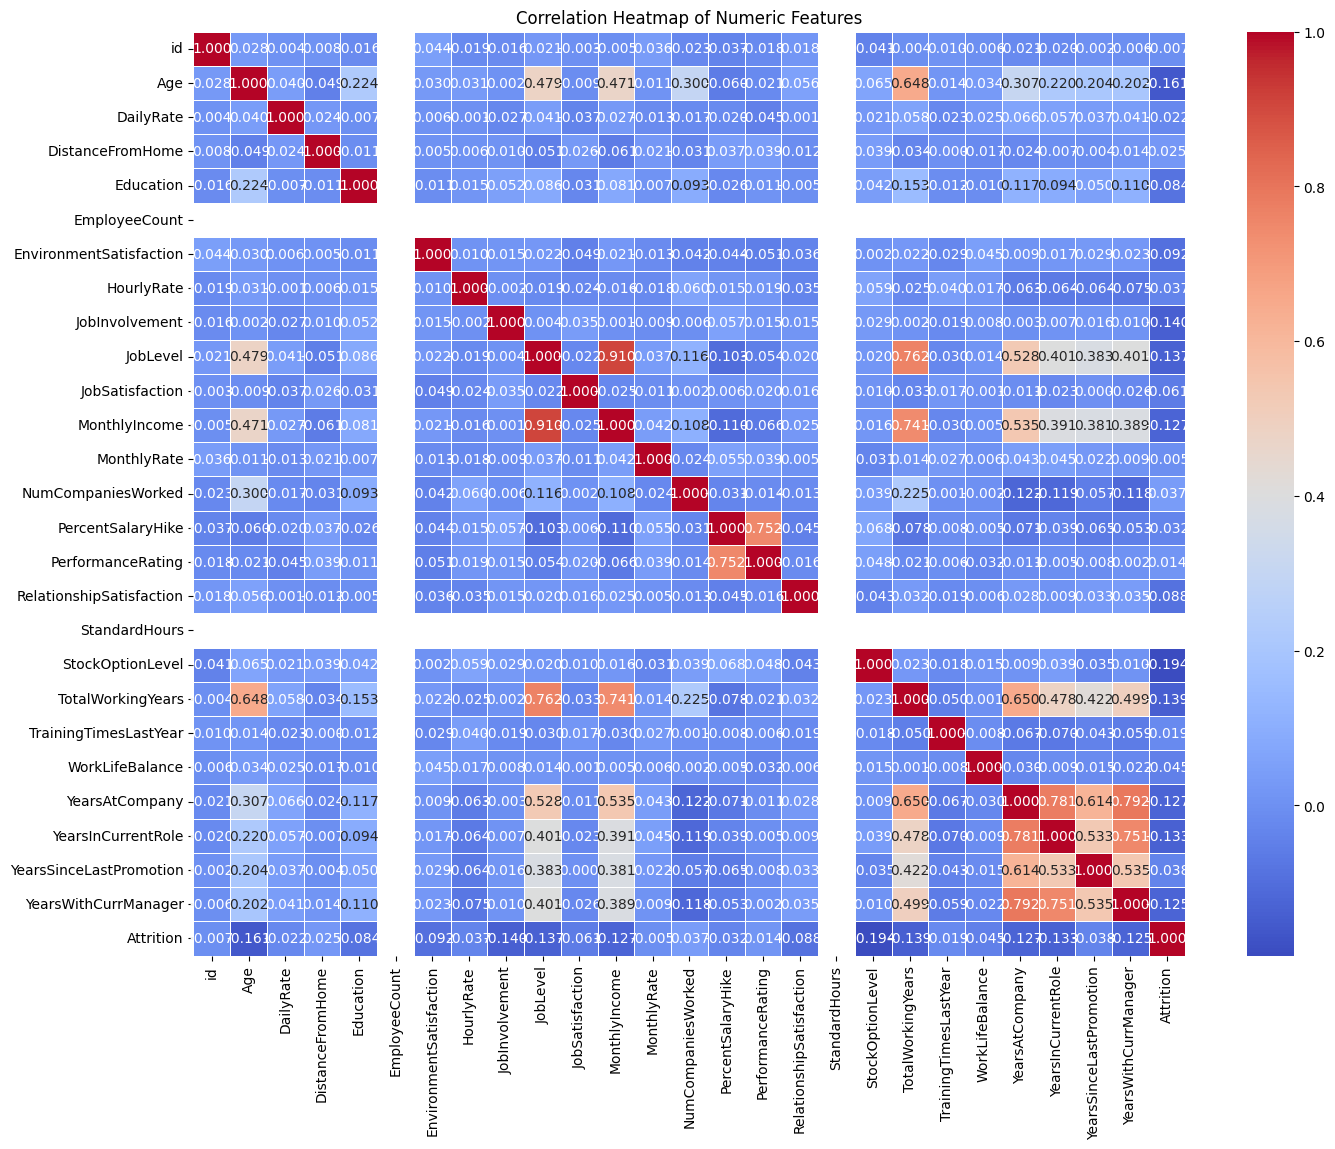

In [8]:
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix for numeric columns only
corr_matrix = dataset[numeric_columns].corr()

# Ploting the heatmap for correlation
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

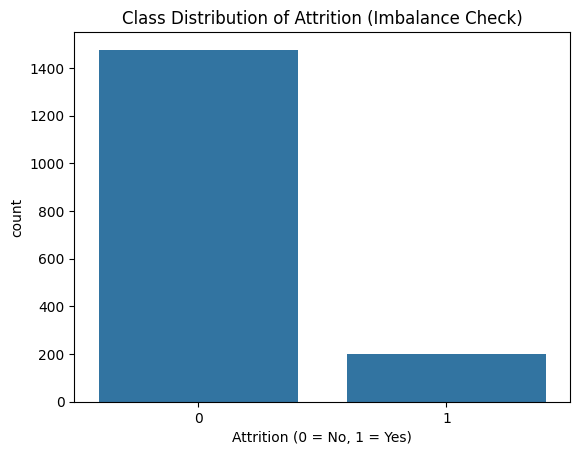

In [9]:
#Checking the class distribution of the target variable 'Attrition'
sns.countplot(x='Attrition', data=dataset)
plt.title('Class Distribution of Attrition (Imbalance Check)')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.show()


In [10]:
#Total number of instances in each class
class_counts = dataset['Attrition'].value_counts()
print("Class distribution:")
print(class_counts)

Class distribution:
Attrition
0    1477
1     200
Name: count, dtype: int64


EDA

In [11]:
##Selecting numerical features
numerical_data = dataset.select_dtypes(include='number')

numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 27 numerical features: 

['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [12]:
#Selecting categoricalfeatures
categorical_data=dataset.select_dtypes(include= 'object')

categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 8 categorical features: 

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [13]:
# Transposed stats for numerical features
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1677.0,838.000000,484.252517,0.0,419.0,838.0,1257.0,1676.0
Age,1677.0,36.036971,8.507112,18.0,30.0,35.0,41.0,60.0
DailyRate,1677.0,892.749553,374.496259,107.0,589.0,890.0,1223.0,3921.0
DistanceFromHome,1677.0,8.683959,7.826143,1.0,2.0,7.0,12.0,29.0
Education,1677.0,2.937984,1.039078,1.0,2.0,3.0,4.0,15.0
EmployeeCount,1677.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,1677.0,2.757901,1.086835,1.0,2.0,3.0,4.0,4.0
HourlyRate,1677.0,67.798450,19.435928,30.0,51.0,69.0,84.0,100.0
JobInvolvement,1677.0,2.782349,0.650664,1.0,2.0,3.0,3.0,4.0
JobLevel,1677.0,1.998807,1.083065,1.0,1.0,2.0,2.0,7.0


In [14]:
# Transposed stats for categorical features
categorical_data.describe().T

,count,unique,top,freq
BusinessTravel,1677,3,Travel_Rarely,1290
Department,1677,3,Research & Development,1167
EducationField,1677,6,Life Sciences,775
Gender,1677,2,Male,1064
JobRole,1677,9,Sales Executive,355
MaritalStatus,1677,3,Married,773
Over18,1677,1,Y,1677
OverTime,1677,2,No,1277


In [15]:
#Variance
numerical_data.var()

,0
id,2.345005e+05
Age,7.237095e+01
DailyRate,1.402474e+05
DistanceFromHome,6.124851e+01
Education,1.079684e+00
EmployeeCount,1.233331e-32
EnvironmentSatisfaction,1.181210e+00
HourlyRate,3.777553e+02
JobInvolvement,4.233637e-01
JobLevel,1.173030e+00


In [16]:
numerical_data.skew()

,0
id,0.000000
Age,0.454093
DailyRate,0.161611
DistanceFromHome,1.071588
Education,0.596937
EmployeeCount,0.000000
EnvironmentSatisfaction,-0.343569
HourlyRate,-0.120302
JobInvolvement,-0.699153
JobLevel,1.170339


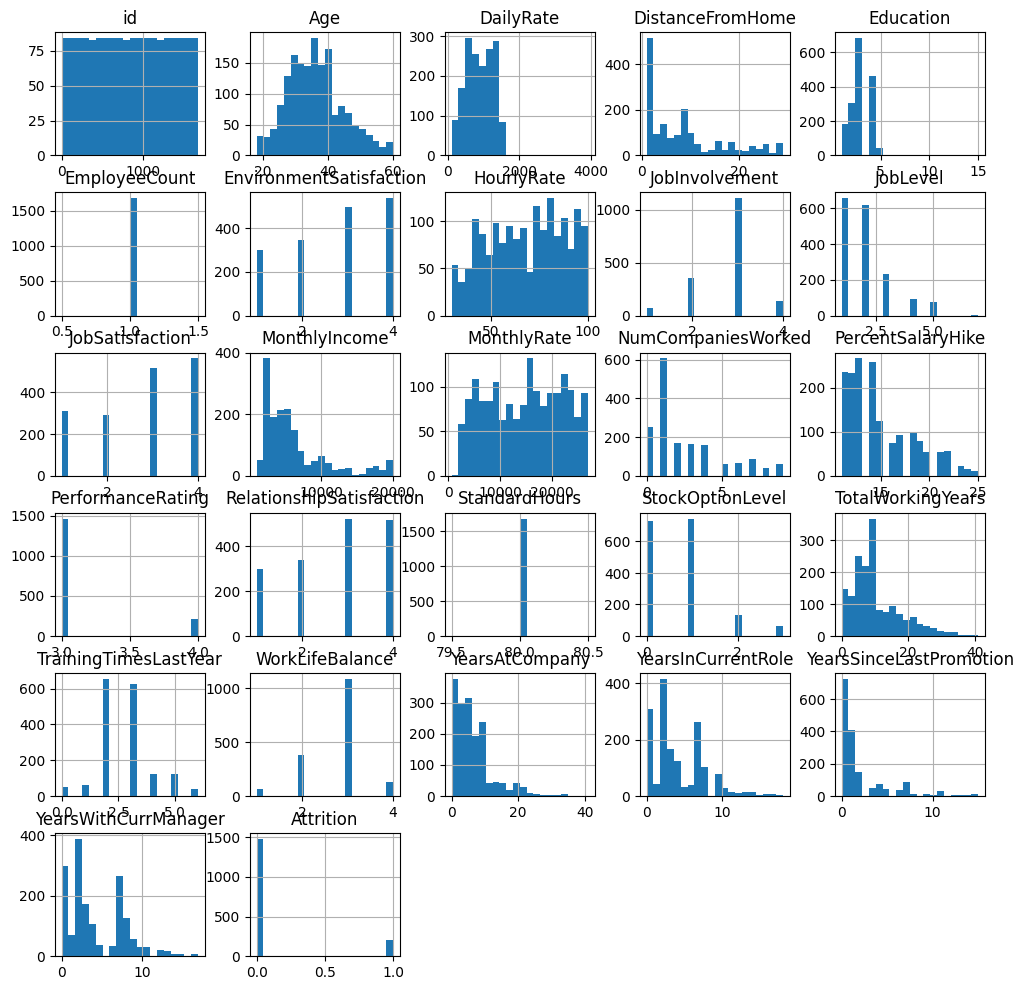

In [17]:
numerical_data.hist(figsize=(12,12),bins=20)
plt.show()

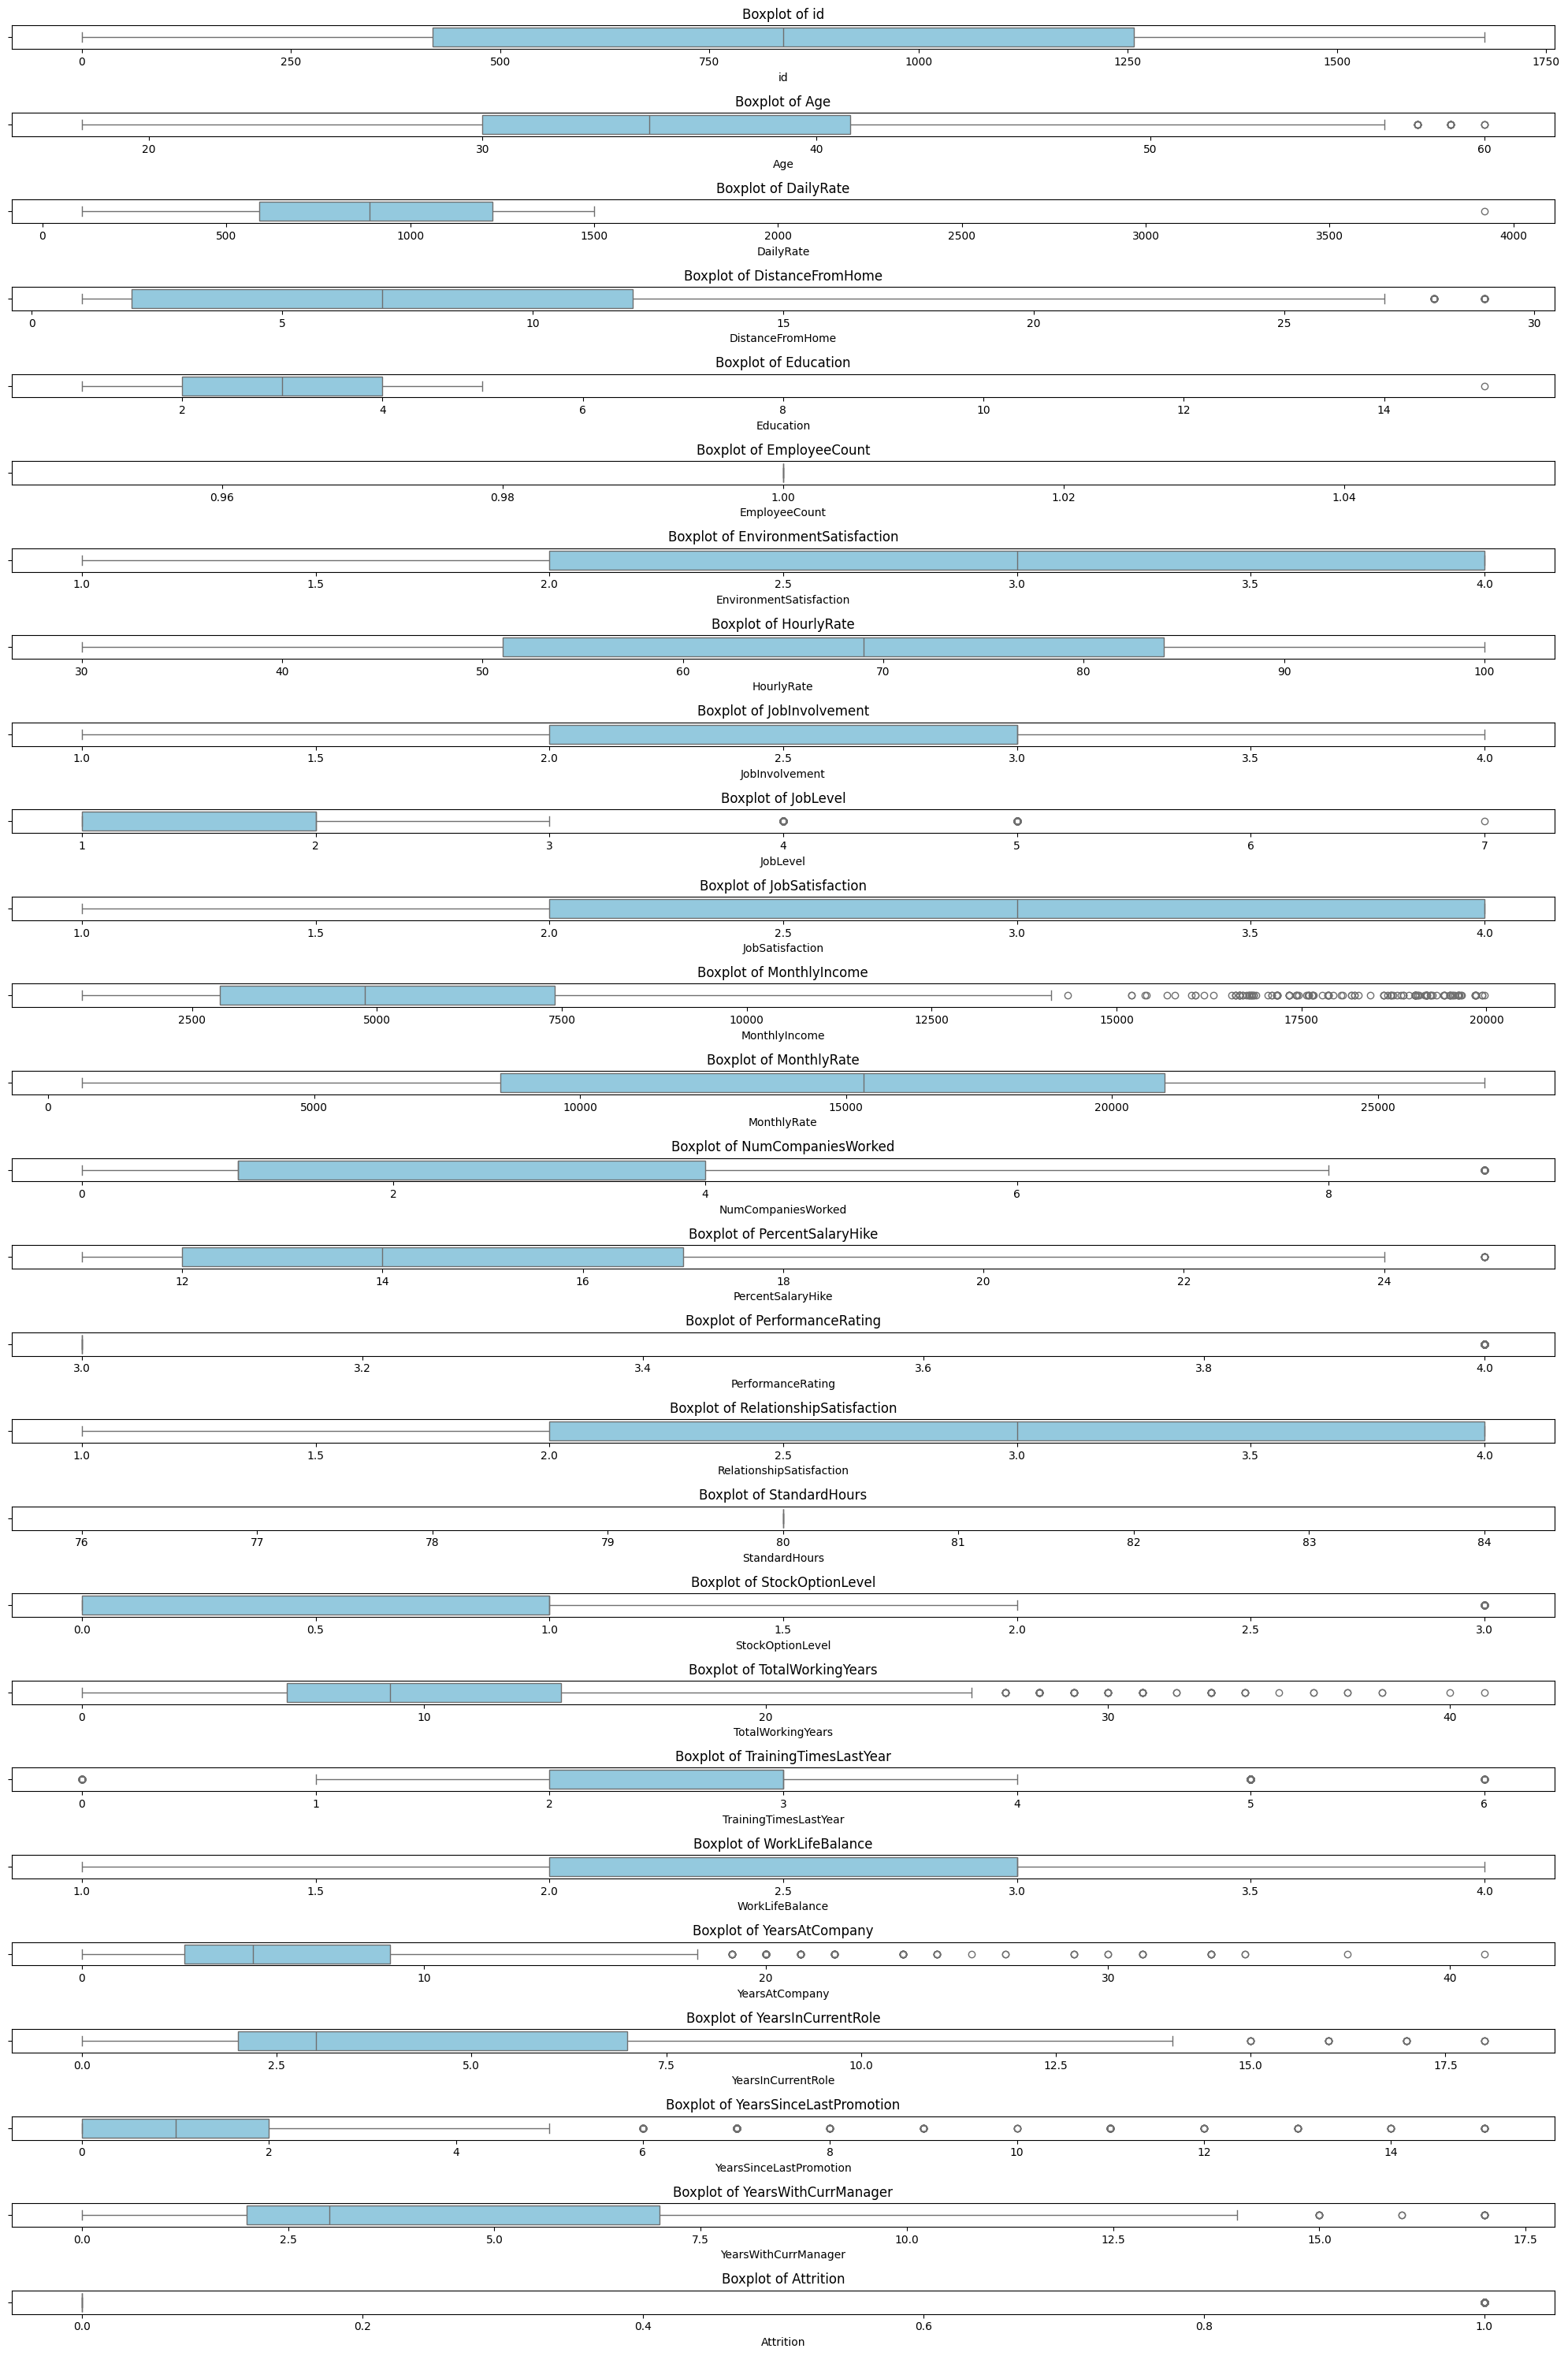

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical columns for boxplot analysis
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 30))

# Ploting boxplots for each numerical feature including the target variable 'OUTCOME'
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=dataset[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.tight_layout()

plt.show()

In [19]:
#Number Unique values in each feature
numerical_data.nunique()

,0
id,1677
Age,43
DailyRate,625
DistanceFromHome,29
Education,6
EmployeeCount,1
EnvironmentSatisfaction,4
HourlyRate,71
JobInvolvement,4
JobLevel,6


In [20]:
numerical_data.isnull().sum()

,0
id,0
Age,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EnvironmentSatisfaction,0
HourlyRate,0
JobInvolvement,0
JobLevel,0


In [30]:
import numpy as np
import pandas as pd

# 1. ALWAYS reload or copy the original data first so you start fresh
# If 'dataset_original' doesn't exist, create it once after loading your CSV
if 'dataset_original' not in locals():
    dataset_original = dataset.copy()

# Reset 'dataset' to the original state every time you run this cell
dataset = dataset_original.copy()

def introduce_missing_values(df, column_name, missing_percentage=0.1):
    n_rows = df.shape[0]
    n_missing = int(n_rows * missing_percentage)
    # Reset random seed if you want the same "random" missing rows every time
    np.random.seed(42)
    missing_indices = np.random.choice(df.index, n_missing, replace=False)
    df.loc[missing_indices, column_name] = np.nan

# 2. Now introduce the missing values
columns_to_introduce_missing = ['Age', 'MonthlyIncome', 'JobSatisfaction']

for col in columns_to_introduce_missing:
    introduce_missing_values(dataset, col, missing_percentage=0.1)

# 3. Check the missing values (It will now stay at ~167 every time)
print(dataset.isnull().sum())

id                            0
Age                         167
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction             167
MaritalStatus                 0
MonthlyIncome               167
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

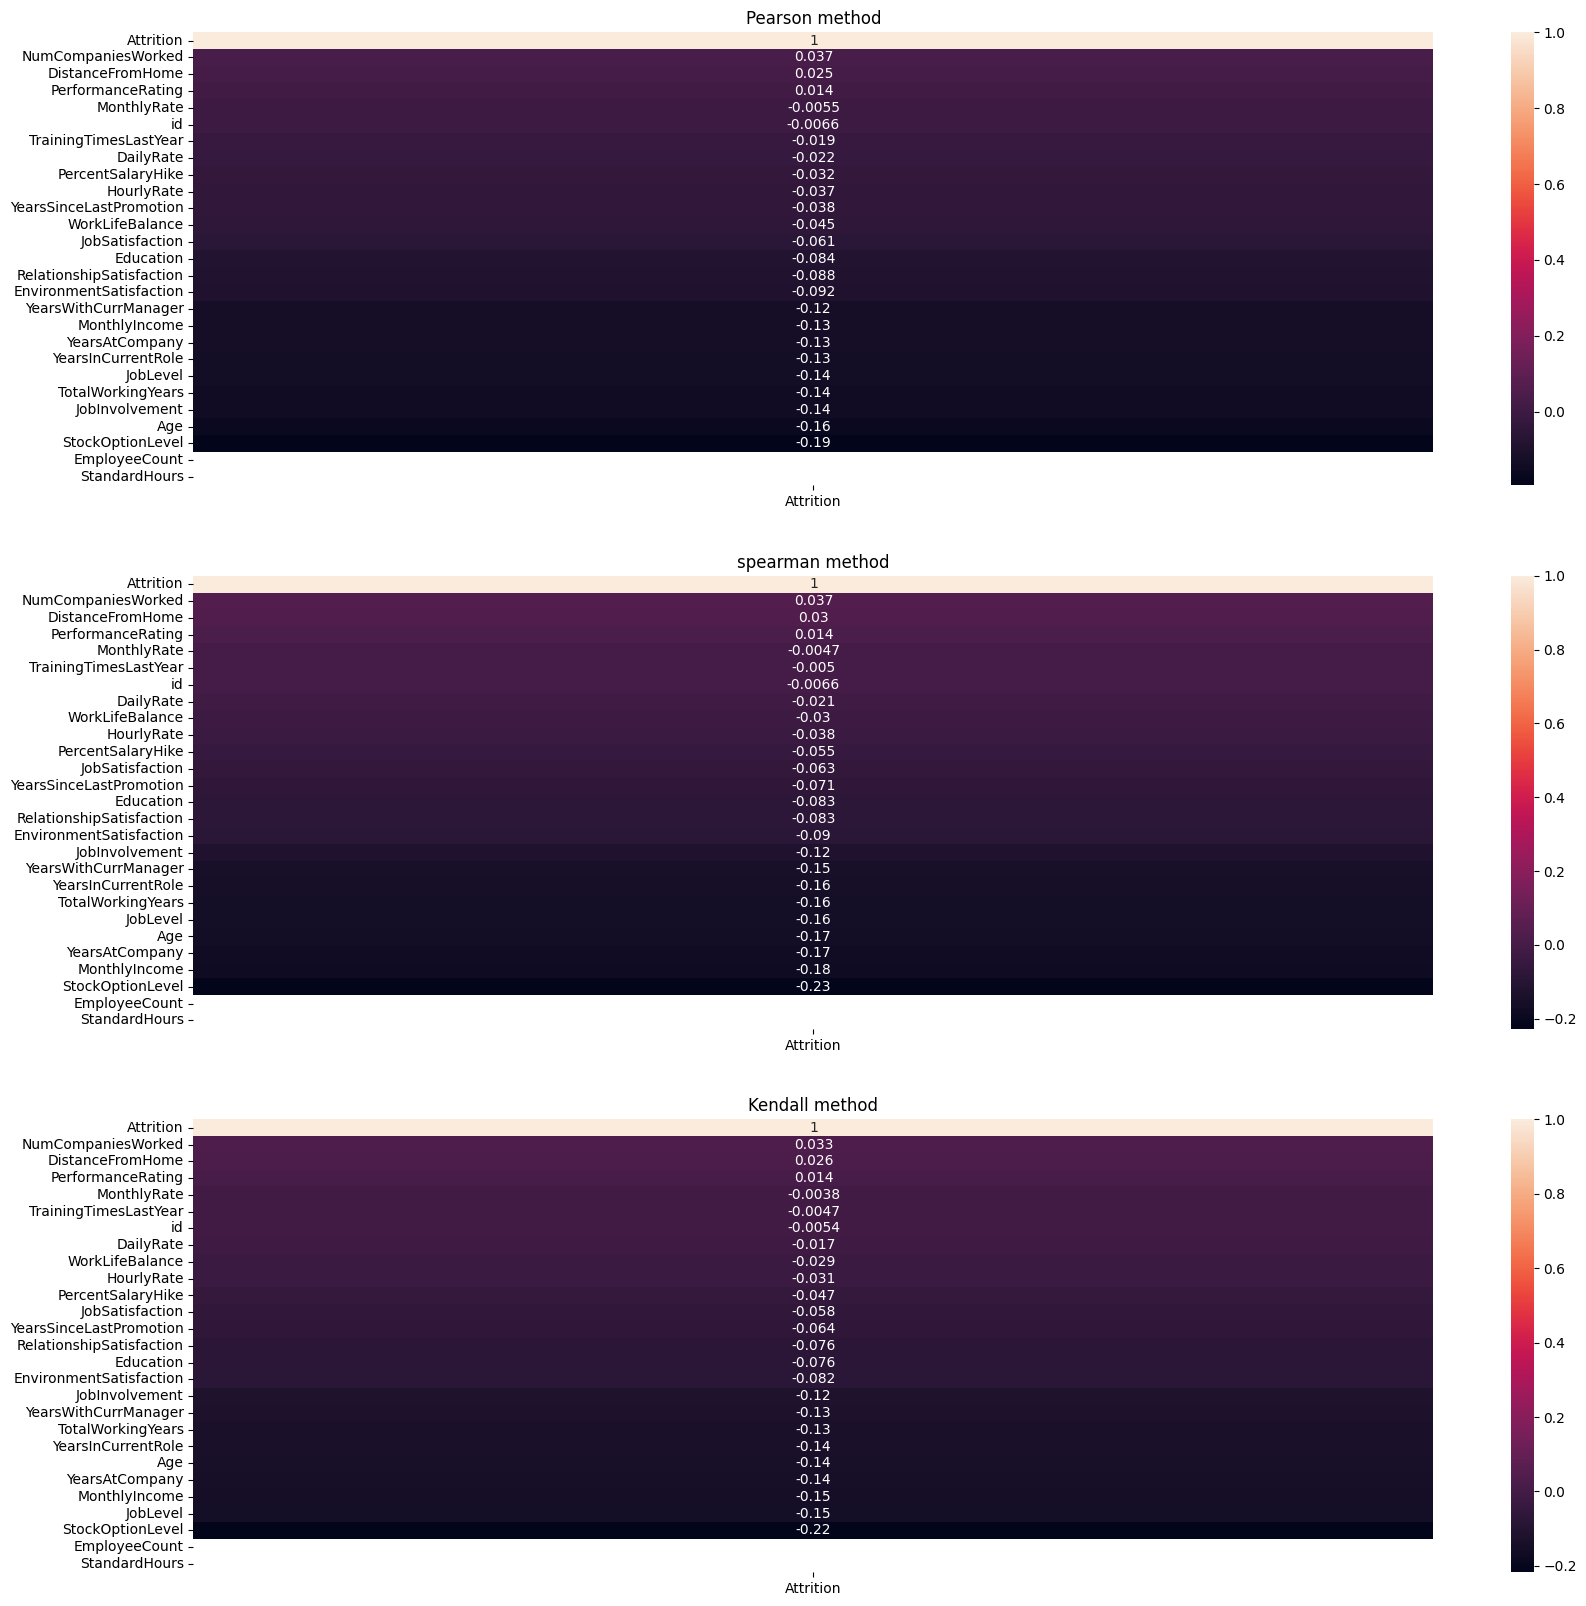

In [31]:
fig, ax = plt.subplots(3,1, figsize=(20, 20))
## Correlation coefficient using different methods
corr1 = numerical_data.corr('pearson')[['Attrition']].sort_values(by='Attrition', ascending=False)
corr2 = numerical_data.corr('spearman')[['Attrition']].sort_values(by='Attrition', ascending=False)
corr3 = numerical_data.corr('kendall')[['Attrition']].sort_values(by='Attrition', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')

## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

In [32]:
#check Imbalance in data

#group instances based on the classes in OUTCOME variable
class_counts=dataset.groupby("Attrition").size()

columns=['attrition','count','percentage']
outcome=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the OUTCOME variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/105000)*100
    percentage.append(percent)

imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df

,attrition,count,percentage
0,0,1477,1.406667
1,1,200,0.190476


Data Preprocessing

In [33]:
from sklearn.impute import SimpleImputer

#Handling Missing Values
#Imputing missing values in numerical columns with mean
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
dataset[numerical_cols] = imputer.fit_transform(dataset[numerical_cols])

# Impute missing values in categorical columns with mode (most frequent)
categorical_cols = dataset.select_dtypes(include=['object']).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
dataset[categorical_cols] = imputer_cat.fit_transform(dataset[categorical_cols])

print(dataset.isnull().sum())

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [34]:
from sklearn.preprocessing import LabelEncoder

#Encoding Categorical Variables
# For binary categorical features (e.g., Gender, OverTime) we are applying Label Encoding
label_encoder = LabelEncoder()

# Encode binary categorical columns
binary_columns = ['Gender', 'OverTime']
for col in binary_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# For multi-class categorical columns we are applying One-Hot Encoding
dataset = pd.get_dummies(dataset, columns=['BusinessTravel', 'Department', 'JobRole'], drop_first=True)

# updated dataset
print(dataset.head())


    id   Age  DailyRate  DistanceFromHome  Education EducationField  \
0  0.0  36.0      599.0              24.0        3.0        Medical   
1  1.0  35.0      921.0               8.0        3.0          Other   
2  2.0  32.0      718.0              26.0        3.0      Marketing   
3  3.0  38.0     1488.0               2.0        3.0        Medical   
4  4.0  50.0     1017.0               5.0        4.0        Medical   

   EmployeeCount  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0            1.0                      4.0       1        42.0  ...   
1            1.0                      1.0       1        46.0  ...   
2            1.0                      3.0       1        80.0  ...   
3            1.0                      3.0       0        40.0  ...   
4            1.0                      2.0       0        37.0  ...   

   Department_Research & Development  Department_Sales  \
0                               True             False   
1                              False

Data Spliting

In [35]:
from sklearn.model_selection import train_test_split


X = dataset.drop('Attrition', axis=1)
y=dataset['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Check the shapes of the resulting splits
print(f"Training data shape: {X_train_final.shape}, Test data shape: {X_test.shape}")


Training data shape: (1072, 43), Test data shape: (336, 43)


In [36]:
# Separating Features and Target
X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# This converts categorical text into numbers using One-Hot Encoding
x_train_encoded = pd.get_dummies(X_train)
x_test_encoded = pd.get_dummies(X_test)


# Ensures both train and test sets have the exact same columns after encoding
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_encoded)
x_test_scaled = scaler.transform(x_test_encoded)

In [37]:
# Checking columns in the original dataset
print(dataset.columns)


Index(['id', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole

Model Training (Supervised)

In [38]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=20, min_samples_leaf=5)


from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(16, 8),
                         activation='relu',
                         solver='adam',
                         max_iter=1000,
                         random_state=42)

models = {
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'Neural Network': nn_model
    }



In [39]:
#Model Training
for name, model in models.items():
  model.fit(x_train_scaled, y_train)

KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train KNN model
knn_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(x_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.875


Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=20, min_samples_leaf=5)

# Train Decision Tree model
dt_model.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(x_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.8363095238095238


Neural Network

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


nn_model = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    solver='adam',
    max_iter=7000,
    learning_rate_init=0.0000001,
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    alpha=0.0001,
    batch_size=64,
    warm_start=True
)

# Training Neural Network model
nn_model.fit(x_train_scaled, y_train)

# Prediction on the test set
y_pred_nn = nn_model.predict(x_test_scaled)

# accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", accuracy_nn)


Neural Network Accuracy: 0.8809523809523809


In [55]:
models = {
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'Neural Network': nn_model
    }

In [56]:
accuracies = {}
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracies[name]:.3f}")

KNN Accuracy: 0.875
Decision Tree Accuracy: 0.836
Neural Network Accuracy: 0.881


Model Traing and Testing (Unsupervised)

[2 0 0 0 0 2 0 1 0 0]
Silhouette Score for KMeans: 0.094


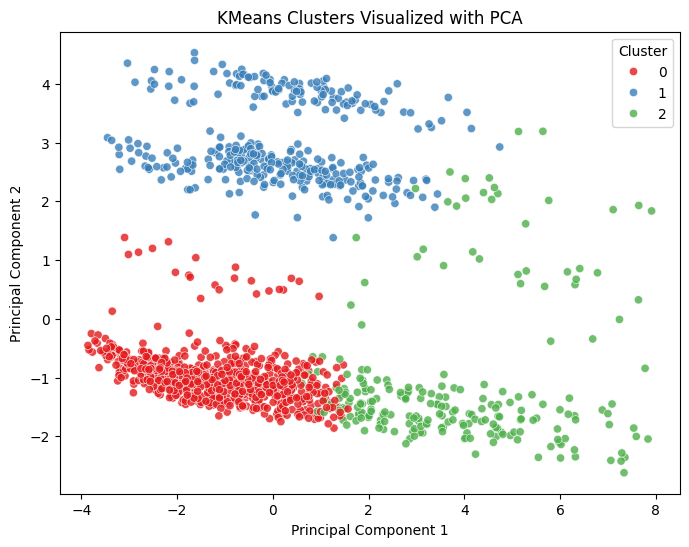

In [57]:
# kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


X = x_train_scaled
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

print(clusters[:10])
score = silhouette_score(X, clusters)
print(f"Silhouette Score for KMeans: {score:.3f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1', alpha=0.8)
plt.title('KMeans Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Model selection/Comparison analysis

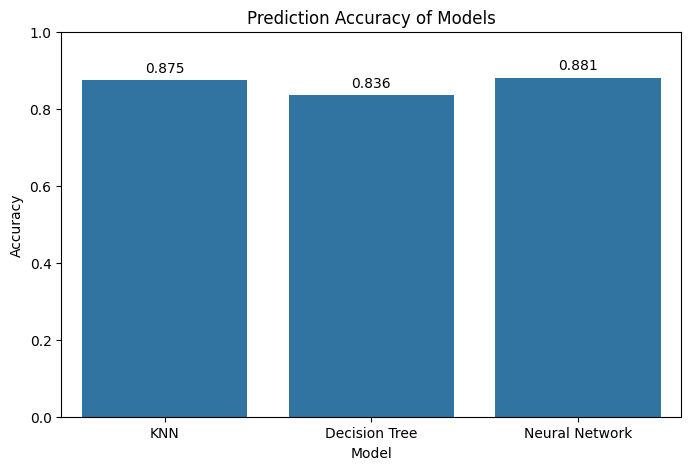

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# List to store accuracies for each model
accuracies = []

for name, model in models.items():

    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append({'Model': name, 'Accuracy': acc})

acc_df = pd.DataFrame(accuracies)

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=acc_df)
plt.title('Prediction Accuracy of Models')
plt.ylim(0, 1)

for i, v in enumerate(acc_df['Accuracy']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

# Show the plot
plt.show()


Precision, recall comparison of each model

In [59]:
metrics = []
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1_score=2*(prec*rec)/(prec+rec)
    metrics.append({'Model': name, 'Precision': prec, 'Recall': rec, 'F1Score': f1_score})

metrics_df = pd.DataFrame(metrics)

print(metrics_df)

            Model  Precision    Recall   F1Score
0             KNN   0.831288  0.875000  0.852584
1   Decision Tree   0.819247  0.836310  0.827690
2  Neural Network   0.895125  0.880952  0.887982


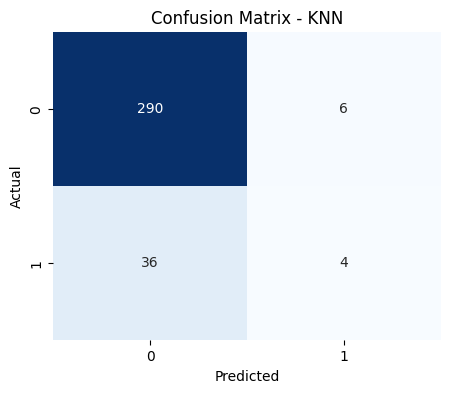

In [60]:
#Confusion Matrix for KNN

y_pred_knn = models['KNN'].predict(x_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy_knn = accuracy_score(y_test, y_pred_knn)

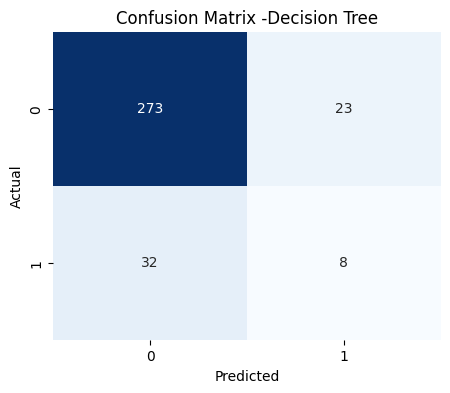

In [61]:
# Confusion Matrix for Decision Tree
from sklearn.metrics import confusion_matrix

# Predict using the trained Decision Tree model
y_pred_dt = dt_model.predict(x_test_scaled)

# Generate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix -Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

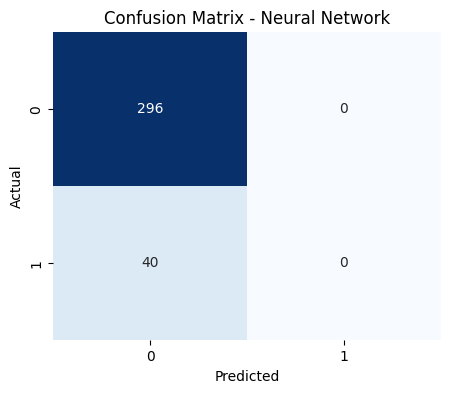

In [62]:
#Confusion Matrix for Neural Network
y_pred_nn = models['Neural Network'].predict(x_test_scaled)
cm_nn = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy_nn = accuracy_score(y_test, y_pred_nn)


AUC score, ROC curve for each model

Training KNN...


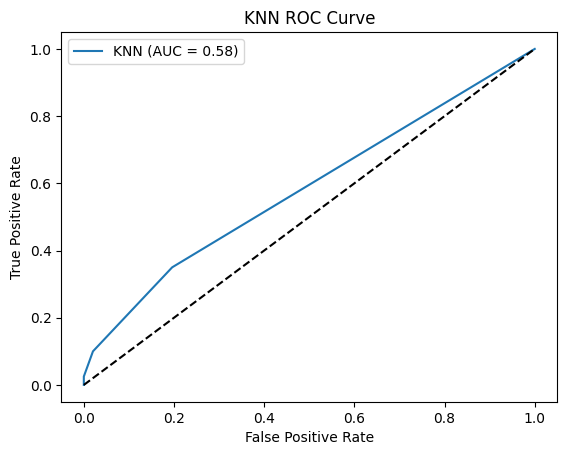

KNN AUC Score: 0.5835
----------------------------------------
Training Decision Tree...


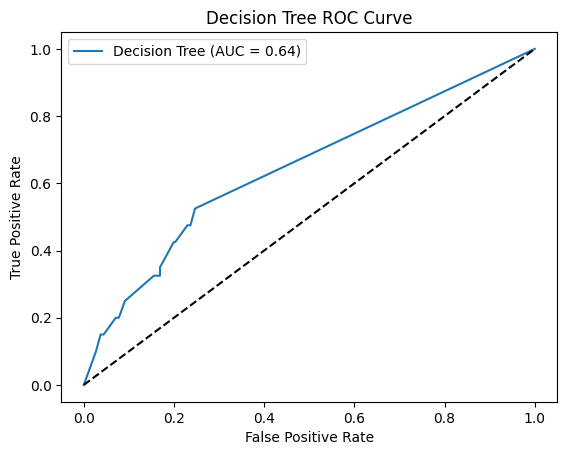

Decision Tree AUC Score: 0.6437
----------------------------------------
Training Neural Network...


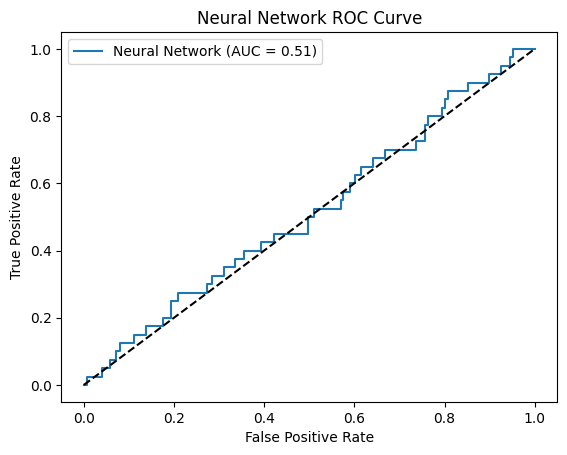

Neural Network AUC Score: 0.5149
----------------------------------------


In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC curve and calculate AUC score
def plot_roc_curve(y_test, y_pred_proba, model_name):
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Calculate AUC score
    auc = roc_auc_score(y_test, y_pred_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='best')
    plt.show()

    return auc

# Train and evaluate each model, including ROC and AUC score
models = {
    'KNN': knn_model,
    'Decision Tree': dt_model,
    'Neural Network': nn_model
}

for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(x_train_scaled, y_train)

    # Predict probabilities (for ROC curve and AUC)
    if name == 'Neural Network':  # For Neural Network, we need to use predict_proba for AUC calculation
        y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]  # Get probability for class 1
    else:
        y_pred_proba = model.predict_proba(x_test_scaled)[:, 1]  # For KNN and Decision Tree

    # Plot ROC curve and calculate AUC score
    auc = plot_roc_curve(y_test, y_pred_proba, name)

    # Print the AUC score
    print(f"{name} AUC Score: {auc:.4f}")
    print("-" * 40)
